# Applying fuzzy clustering to new dataset

In [1]:
import math
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

## import ExtractRulesQPSO class
import sys, os
sys.path.append(os.getcwd() + '/scripts')

from importlib import reload
import ExtractRulesQPSO
reload(ExtractRulesQPSO)

from ExtractRulesQPSO import ExtractRulesQPSO
from FuzzyClustering import FuzzyClustering
from FuzzyRule import FuzzyRule

In [2]:
df = pd.read_csv('./data/data_extraction.csv', header=1)
df.head()

,x,y,x.1,y.1,x.2,y.2
0,-1.513584,2.021725,-1.407596,-0.688274,2.236173,2.033473
1,-1.231298,2.011772,-1.159470,-0.651288,2.387670,1.929299
2,-1.247023,1.969969,-1.025865,-0.692831,2.306333,1.850828
3,-0.716827,2.007446,-1.539035,-0.751166,2.024913,1.819007
4,-0.831566,1.939361,-1.504118,-0.834656,2.194410,1.646978


In [3]:
df = df.dropna()

## Training and testing split

In [4]:
TEST_SIZE = 0.3

In [5]:
df_train, df_test = train_test_split(df, test_size=TEST_SIZE)

In [6]:
df_train.shape, df_test.shape

((417, 6), (180, 6))

In [7]:
df_train.head()

,x,y,x.1,y.1,x.2,y.2
59,-0.275869,1.398519,-0.907200,-0.962893,11.864311,-0.571177
137,-1.270780,-0.493936,4.565790,-1.206060,4.344372,1.990146
517,-1.524914,0.986609,-1.023055,-0.939914,8.933474,1.067314
134,-1.492979,-0.181007,2.271358,-0.946665,4.824791,2.027535
367,-1.102141,-0.047870,12.319707,-1.094752,4.341379,0.686226


## Processing the data into three classes

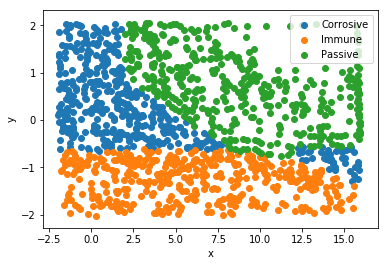

In [8]:
data_corrosive = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x'].values[idx], df_train['y'].values[idx]])
    data_corrosive.append(tmp)

data_corrosive = np.array(data_corrosive)


data_immune = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x.1'].values[idx], df_train['y.1'].values[idx]])
    data_immune.append(tmp)

data_immune = np.array(data_immune)

data_passive = []
for idx in range(df_train.shape[0]):
    tmp = np.array([df_train['x.2'].values[idx], df_train['y.2'].values[idx]])
    data_passive.append(tmp)

data_passive = np.array(data_passive)


plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')
plt.xlabel('x')
plt.ylabel('y')
plt.legend();

## Applying the fuzzy clustering

In [9]:
fc_corrosive = FuzzyClustering(data_corrosive)
fc_immune = FuzzyClustering(data_immune)
fc_passive = FuzzyClustering(data_passive)

In [10]:
## finding centers
fc_corrosive.extractClusteringCenters()
centers_corrosive = fc_corrosive.getDenormalizedClusterCenters()

fc_immune.extractClusteringCenters()
centers_immune = fc_immune.getDenormalizedClusterCenters()

fc_passive.extractClusteringCenters()
centers_passive = fc_passive.getDenormalizedClusterCenters()

In [11]:
centers_corrosive, centers_immune, centers_passive

(array([[ 1.52178024,  0.25345948],
        [-0.16031478,  1.59472809],
        [14.12542624, -0.80567493]]), array([[ 5.50081056, -1.02141364],
        [12.11300867, -1.30589751],
        [ 2.47979506, -1.76818651],
        [-1.56821264, -0.944428  ],
        [12.10599813, -1.93533767]]), array([[ 6.27910698,  0.86192243],
        [12.80544083,  0.23707155],
        [ 3.65247679,  1.74873247],
        [ 8.13006416, -0.53067991]]))

In [12]:
centers_corrosive_df = pd.DataFrame(centers_corrosive)
num_rules_corrosive = len(centers_corrosive)
centers_corrosive_df.columns = ['x' + str(i + 1) for i in range(len(centers_corrosive[0]))]
centers_corrosive_df['class_label'] = 'Corrosive'

centers_immune_df = pd.DataFrame(centers_immune)
num_rules_immune = len(centers_immune)
centers_immune_df.columns = ['x' + str(i + 1) for i in range(len(centers_immune[0]))]
centers_immune_df['class_label'] = 'Immune'

centers_passive_df = pd.DataFrame(centers_passive)
num_rules_passive = len(centers_passive)
centers_passive_df.columns = ['x' + str(i + 1) for i in range(len(centers_passive[0]))]
centers_passive_df['class_label'] = 'Passive'

In [13]:
all_class_centers = []
all_class_centers.append(centers_corrosive)
all_class_centers.append(centers_immune)
all_class_centers.append(centers_passive)

all_class_centers

[array([[ 1.52178024,  0.25345948],
        [-0.16031478,  1.59472809],
        [14.12542624, -0.80567493]]), array([[ 5.50081056, -1.02141364],
        [12.11300867, -1.30589751],
        [ 2.47979506, -1.76818651],
        [-1.56821264, -0.944428  ],
        [12.10599813, -1.93533767]]), array([[ 6.27910698,  0.86192243],
        [12.80544083,  0.23707155],
        [ 3.65247679,  1.74873247],
        [ 8.13006416, -0.53067991]])]

## Plotting clustering results

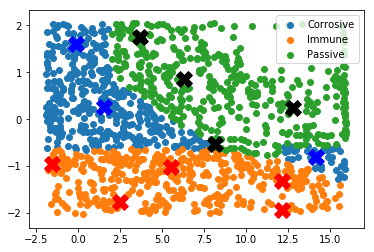

In [14]:
plt.scatter(data_corrosive[:,0], data_corrosive[:,1], label = 'Corrosive')
plt.scatter(data_immune[:,0], data_immune[:,1], label = 'Immune')
plt.scatter(data_passive[:,0], data_passive[:,1], label = 'Passive')

## Add centers of Corrosive
for cs in centers_corrosive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'blue', s = 250)

## Add centers of Immune
for cs in centers_immune:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'red', s = 250)
    
## Add centers of Passive
for cs in centers_passive:
    plt.scatter(cs[0], cs[1], marker = 'X', color = 'black', s = 250)

plt.legend();

## QPSO

In [16]:
qpso = ExtractRulesQPSO(20, 50, 2 * (len(centers_corrosive) + len(centers_immune) + len(centers_passive)))

In [17]:
qpso.solver([centers_corrosive, centers_immune, centers_passive], 
            [data_corrosive, data_immune, data_passive])

In [18]:
qpso.best_particle

array([  1.65913246,   0.63232313,   2.03979092,   1.07806816,
        -0.34693571,   0.31866163, -54.80715805,   0.51760581,
        -0.24926043, 151.14274673,  34.2266232 ,   0.40777159,
         0.24157313,  -0.21354479,   5.38270621,  -1.09992063,
         1.21390532,  -1.23091376,   3.9617938 ,   0.51041472,
         0.76610088,  -1.47739422,  -0.24676371,  21.55063701])

In [19]:
tuned_stds = ExtractRulesQPSO._arrangeStds(qpso.best_particle, all_class_centers)
stds_corrosive, stds_immune, stds_passive = tuned_stds
tuned_stds

[array([[ 1.65913246,  0.63232313],
        [ 2.03979092,  1.07806816],
        [-0.34693571,  0.31866163]]), array([[-54.80715805,   0.51760581],
        [ -0.24926043, 151.14274673],
        [ 34.2266232 ,   0.40777159],
        [  0.24157313,  -0.21354479],
        [  5.38270621,  -1.09992063]]), array([[ 1.21390532, -1.23091376],
        [ 3.9617938 ,  0.51041472],
        [ 0.76610088, -1.47739422],
        [-0.24676371, 21.55063701]])]

In [20]:
stds_passive

array([[ 1.21390532, -1.23091376],
       [ 3.9617938 ,  0.51041472],
       [ 0.76610088, -1.47739422],
       [-0.24676371, 21.55063701]])

## Showing rules

/Users/Minshen/anaconda3/lib/python3.6/site-packages/matplotlib/pyplot.py:514: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


<Figure size 432x288 with 0 Axes>

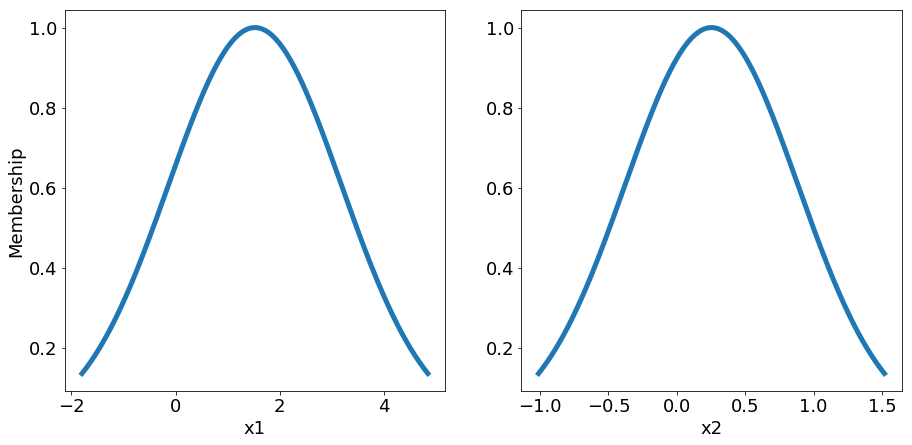

<Figure size 432x288 with 0 Axes>

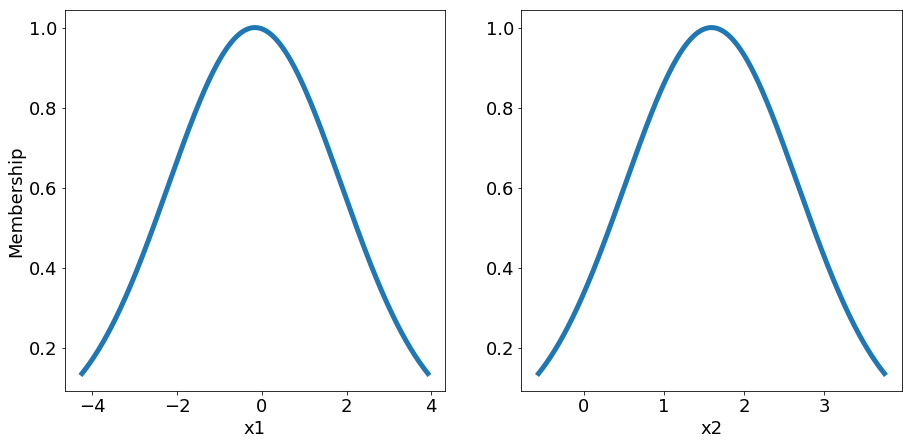

<Figure size 432x288 with 0 Axes>

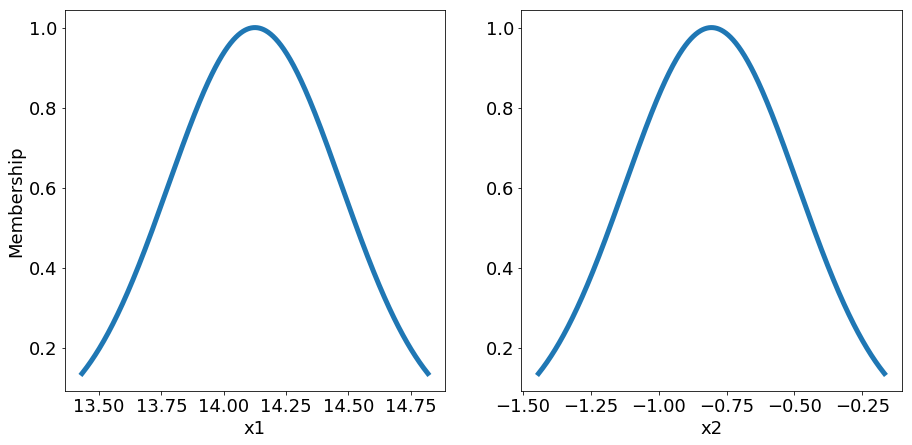

<Figure size 432x288 with 0 Axes>

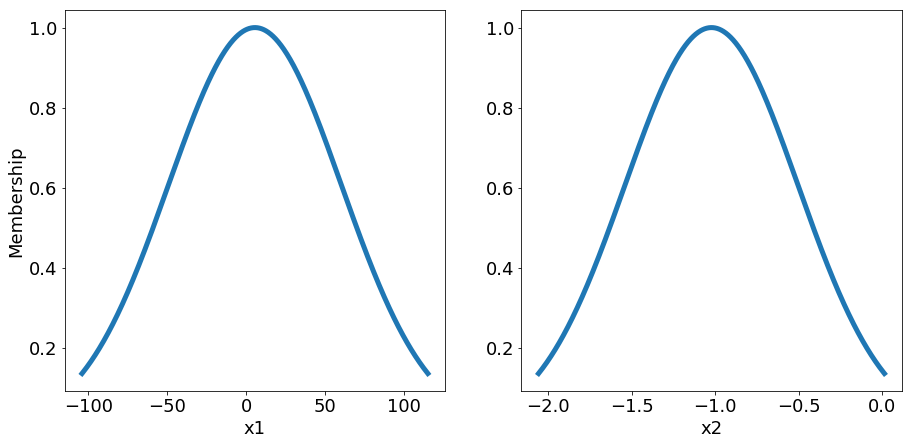

<Figure size 432x288 with 0 Axes>

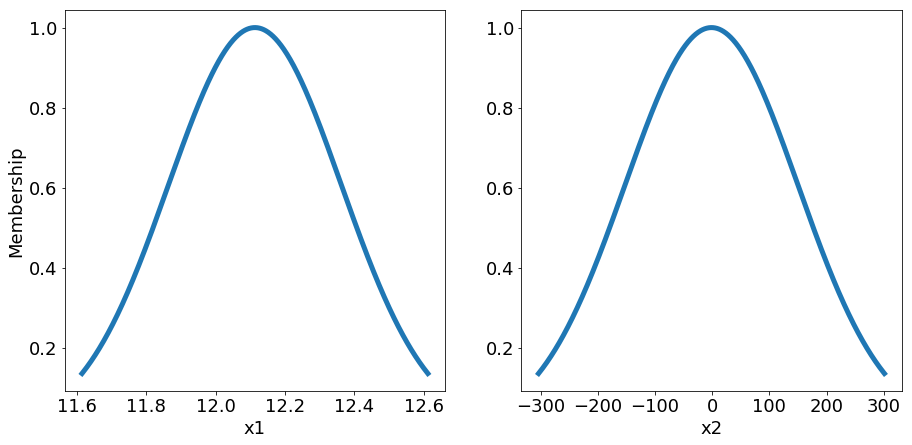

<Figure size 432x288 with 0 Axes>

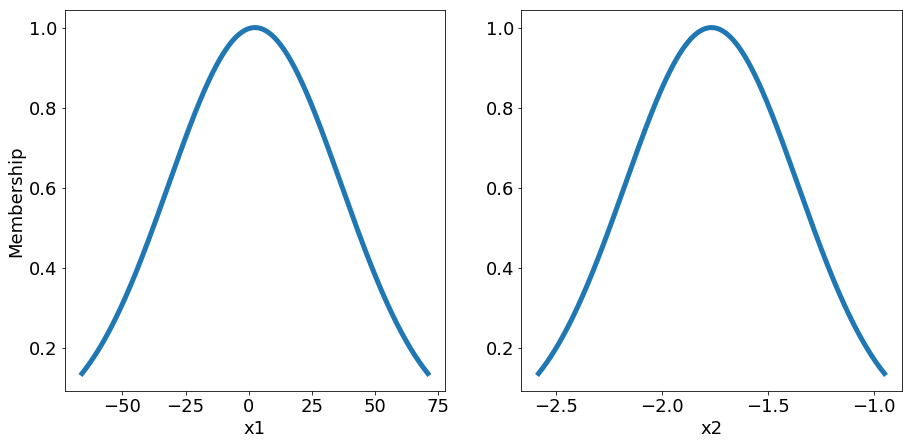

<Figure size 432x288 with 0 Axes>

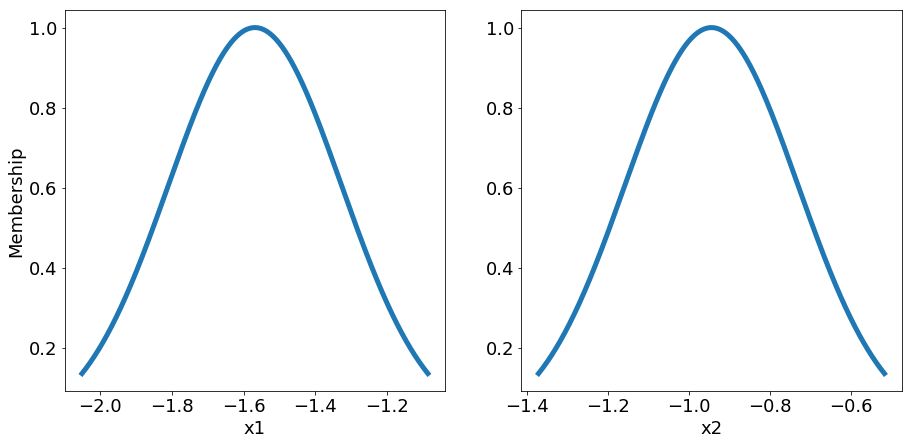

<Figure size 432x288 with 0 Axes>

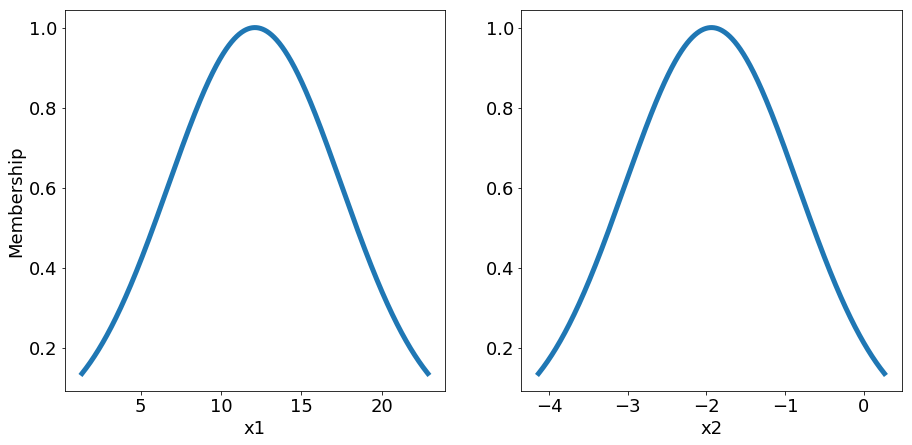

<Figure size 432x288 with 0 Axes>

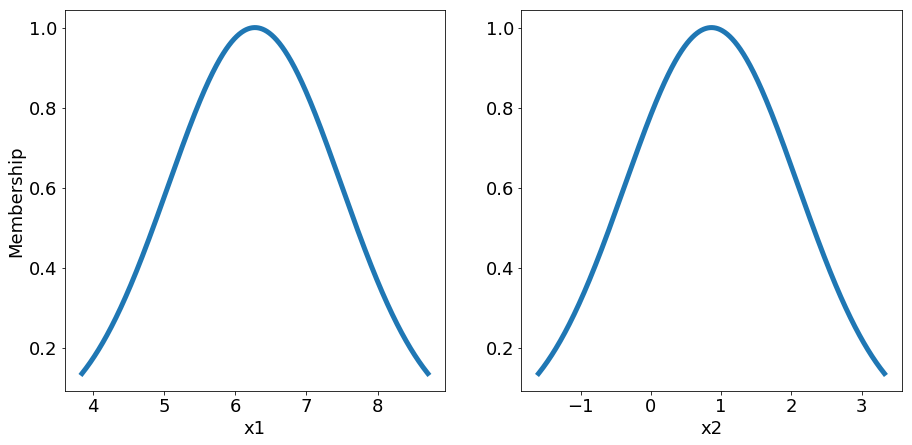

<Figure size 432x288 with 0 Axes>

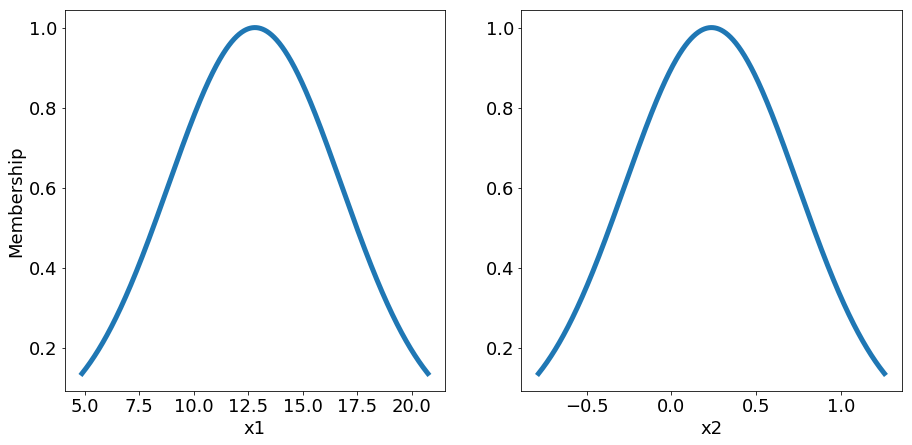

<Figure size 432x288 with 0 Axes>

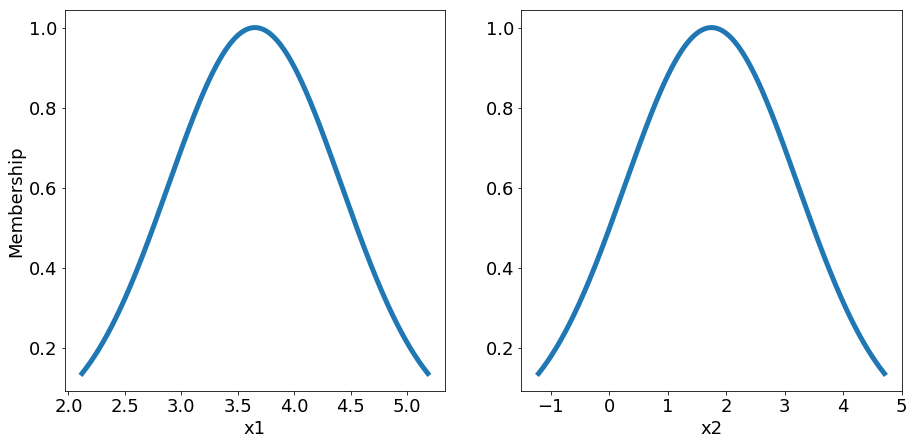

<Figure size 432x288 with 0 Axes>

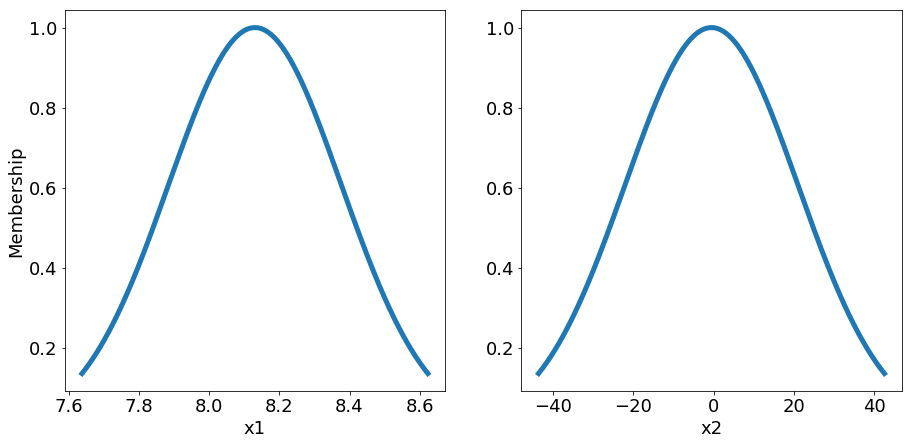

In [21]:
class_labels = ['Corrosive', 'Immune', 'Passive']

for all_centers, all_stds, class_label in zip(all_class_centers, tuned_stds, class_labels):
    # iterate through all classes
    
    for centers, stds in zip(all_centers, all_stds):
        # iterate through all rules
        rule = FuzzyRule(centers, stds, class_label)
        rule.plotRule()

## Testing results

In [30]:
xs = []
ys = []
testing_labels = []

test_data_corrosive = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x'].values[idx], df_test['y'].values[idx]])
    test_data_corrosive.append(tmp)

test_data_corrosive = np.array(test_data_corrosive)

test_data_immune = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x.1'].values[idx], df_test['y.1'].values[idx]])
    test_data_immune.append(tmp)

test_data_immune = np.array(test_data_immune)

test_data_passive = []
for idx in range(df_test.shape[0]):
    tmp = np.array([df_test['x.2'].values[idx], df_test['y.2'].values[idx]])
    test_data_passive.append(tmp)

test_data_passive = np.array(test_data_passive)

In [31]:
for data_point in test_data_corrosive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

    
for data_point in test_data_immune:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )
    
for data_point in test_data_passive:
    xs.append(data_point[0])
    ys.append(data_point[1])
    testing_labels.append(
        ExtractRulesQPSO._returnClassWithMaxMF(all_class_centers, tuned_stds, data_point, class_labels)
    )

In [32]:
testing_data_points_df = pd.DataFrame(data={
    'x': xs,
    'y': ys,
    'label': testing_labels
})

testing_data_points_df.head()

,x,y,label
0,1.385832,-0.578085,Immune
1,-0.646851,0.735960,Corrosive
2,1.111518,1.447547,Corrosive
3,2.539011,0.586120,Corrosive
4,14.947080,-1.183153,Immune


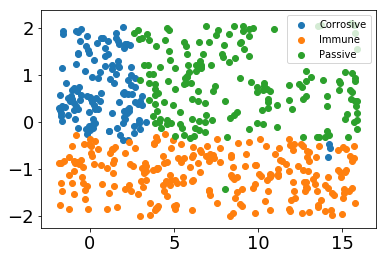

In [34]:
plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Corrosive']['x'], 
    testing_data_points_df[testing_data_points_df['label'] == 'Corrosive'].y,
    label='Corrosive'
)

plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Immune']['x'],
    testing_data_points_df[testing_data_points_df['label'] == 'Immune'].y,
    label='Immune'
)

plt.scatter(
    testing_data_points_df[testing_data_points_df['label'] == 'Passive'].x, 
    testing_data_points_df[testing_data_points_df['label'] == 'Passive'].y,
    label='Passive'
)

plt.legend()